In [1]:
import json
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
SMALL_SIZE  = 15
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font', size        = MEDIUM_SIZE)   # controls default text sizes
plt.rc('axes', titlesize   = SMALL_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize   = MEDIUM_SIZE)   # fontsize of the x and y labels
plt.rc('xtick', labelsize  = SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize  = SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize  = SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize = BIGGER_SIZE)   # fontsize of the figure title

In [3]:
### get best fitness

run_fitness    = {i: None for i in range(0, 5)}
run_layers     = {i: None for i in range(0, 5)}
run_parameters = {i: None for i in range(0, 5)}

for run in range(0, 5):
    
    best_fitness    = []
    best_layers     = []
    best_parameters = []
    
    for gen in range(0, 50):

        path = "experiments/run_{}/gen_{}.csv".format(run, gen)
        
        with open(path) as f:
            data = json.load(f)
        
        data = pd.DataFrame(data)
        data.set_index("id", inplace = True, drop = True)
        
        fit = data[data.fitness == max(data.fitness)]
        
        best_parameters.append(data.loc[fit.index[0], 'trainable_parameters'])
        best_fitness.append(fit.fitness.values[0])
        best_layers.append(int(data.loc[fit.index[0], "phenotype"].split("input:")[-1].split(" ")[0]))
        
        
    run_fitness[run]    = best_fitness
    run_layers[run]     = best_layers
    run_parameters[run] = best_parameters
    
df_fitness    = pd.DataFrame.from_dict(run_fitness)
df_layers     = pd.DataFrame.from_dict(run_layers)
df_parameters = pd.DataFrame.from_dict(run_parameters)

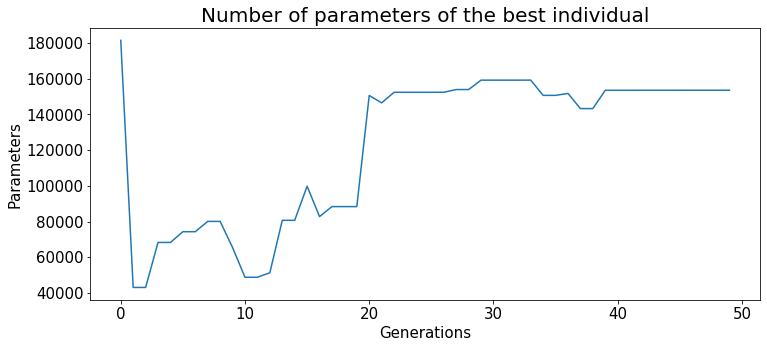

In [4]:
ax = df_parameters.mean(axis = 1).plot(figsize = (12, 5))

ax.set_xlabel("Generations")
ax.set_ylabel("Parameters")

ax.set_title("Number of parameters of the best individual", fontsize = 20)

plt.savefig('plots/parameters.png', dpi = 600)

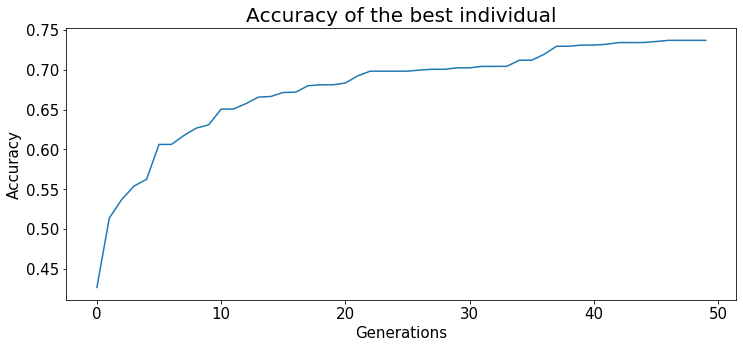

In [5]:
ax = df_fitness.mean(axis = 1).plot(figsize = (12, 5))

ax.set_xlabel("Generations")
ax.set_ylabel("Accuracy")

ax.set_title("Accuracy of the best individual", fontsize = 20)

plt.savefig('plots/accuracy.png', dpi = 600)

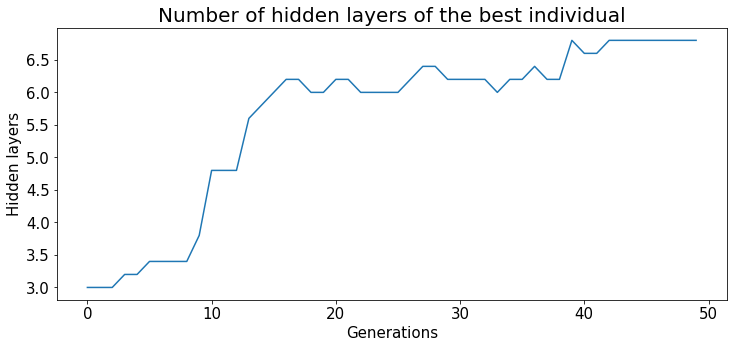

In [6]:
ax = df_layers.mean(axis = 1).plot(figsize = (12, 5))

ax.set_xlabel("Generations")
ax.set_ylabel("Hidden layers")

ax.set_title("Number of hidden layers of the best individual", fontsize = 20)

plt.savefig('plots/layers.png', dpi = 600)

In [9]:
df_fitness

,0,1,2,3,4
0,0.440571,0.465714,0.409714,0.383714,0.435429
1,0.506286,0.500571,0.523143,0.474571,0.565429
2,0.508000,0.567714,0.546286,0.490286,0.574000
3,0.528000,0.586857,0.563143,0.518857,0.574286
4,0.528000,0.586857,0.563143,0.560571,0.574286
5,0.602000,0.586857,0.626857,0.574571,0.641143
6,0.602000,0.586857,0.626857,0.574571,0.641143
7,0.609143,0.610000,0.626857,0.600286,0.641143
8,0.616286,0.610000,0.650286,0.612571,0.644571
9,0.616286,0.610000,0.653714,0.612571,0.661714


In [10]:
df_layers.iloc[-1, :]

0     5
1     6
2    12
3     6
4     5
Name: 49, dtype: int64

In [11]:
df_parameters.iloc[-1, :]

0     23593
1     74829
2    153062
3    440550
4     75872
Name: 49, dtype: int64

In [12]:
df_fitness.max()

0    0.710571
1    0.747143
2    0.810000
3    0.662571
4    0.753429
dtype: float64

In [36]:
path = "experiments/run_2/gen_49.csv".format(run, gen)
        
with open(path) as f:
    data = json.load(f)

data = pd.DataFrame(data)
data.set_index("id", inplace = True, drop = True)

In [37]:
data.loc[5, "phenotype"]

'layer:conv num-filters:34 filter-shape:2 stride:1 padding:same act:relu bias:True input:-1 layer:conv num-filters:34 filter-shape:2 stride:1 padding:same act:relu bias:True input:0 layer:batch-norm input:1 layer:conv num-filters:53 filter-shape:1 stride:1 padding:same act:sigmoid bias:True input:2 layer:batch-norm input:3 layer:conv num-filters:34 filter-shape:2 stride:1 padding:same act:relu bias:True input:4 layer:pool-avg kernel-size:2 stride:1 padding:same input:5 layer:conv num-filters:27 filter-shape:3 stride:2 padding:valid act:tanh bias:False input:6 layer:conv num-filters:27 filter-shape:3 stride:2 padding:valid act:tanh bias:False input:7 layer:pool-avg kernel-size:2 stride:1 padding:valid input:8 layer:dropout rate:0.47691297549233286 input:9 layer:fc act:relu num-units:126 bias:True input:10 layer:dropout rate:0.04016555323788083 input:11 layer:fc act:softmax num-units:10 bias:True input:12 learning:gradient-descent lr:0.01272574740857138 momentum:0.9190408624796864 decay: